# `20180224b` - Client side

Testing

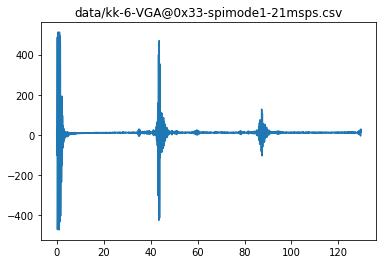

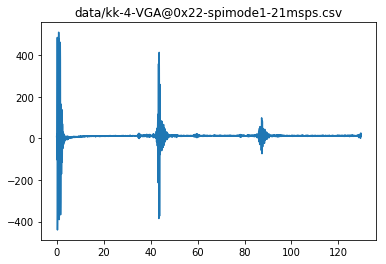

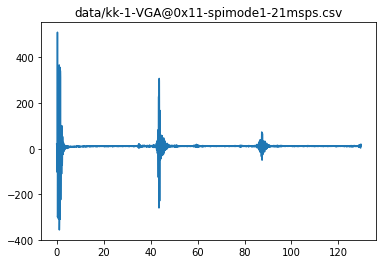

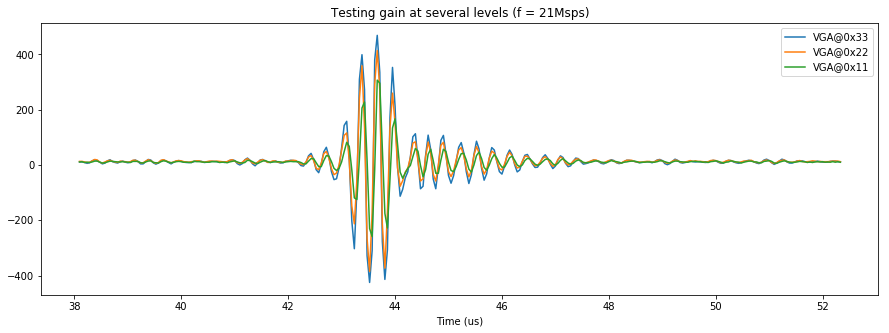

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import re
import glob, os

AA = []
lbl = []
filenames = []
for CSVFile in glob.glob("data/kk-*.csv"):
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    filenames.append(  CSVFile )
    #F = int(CSVFile.split(".")[0])

    if (A[4]) < 0b111: 
        for i in range(len(A)/2-1):
            value = 256*(A[2*i+2]&0b11) + A[2*i+1] - 512
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i]
    else:

        for i in range(len(A)/2-1):
            value = 256*(A[2*i+1]&0b11) + A[2*i] - 512
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    AA.append(tmp)
    
    t = [ 1.0*x/f for x in range(len(tmp))]
    
    #t = t*1.0/f
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig("images/"+CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()

st = 800
sp = 1100



plt.figure(figsize=(15,5))
for m in range(len(AA)):
    plt.plot(t[st:sp],AA[m][st:sp],label=lbl[m])

#F = int(CSVFile.split(".")[0])
plt.title("Testing gain at several levels (f = 21Msps)")
plt.xlabel("Time (us)")
plt.legend()
plt.savefig("images/comparing_gain.jpg")
plt.show()


# Reviewing the spectrum of the acquisition

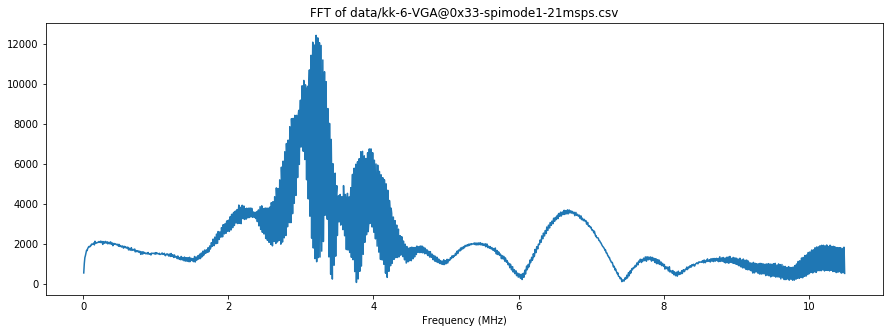

In [32]:
plt.figure(figsize=(15,5))

FFT = np.fft.fft(AA[0])
l = len(FFT)/2
fx = [ f*1.0*x/(2.0*l) for x in range(len(FFT))]

plt.title("FFT of "+filenames[0])
plt.plot(fx[1:l],np.abs(FFT)[1:l])
plt.xlabel("Frequency (MHz)")
plt.savefig("images/fft.jpg")
plt.show()